In [193]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [194]:
X, y, centers = make_blobs(
    n_samples=600,
    centers=3,
    cluster_std=0.80,
    center_box=(0, 10.0),
    return_centers=True,
    shuffle=False,
)
X.shape, y.shape, centers

((600, 2),
 (600,),
 array([[9.2994173 , 9.52672931],
        [0.50837521, 5.06771939],
        [0.08219334, 2.97724811]]))

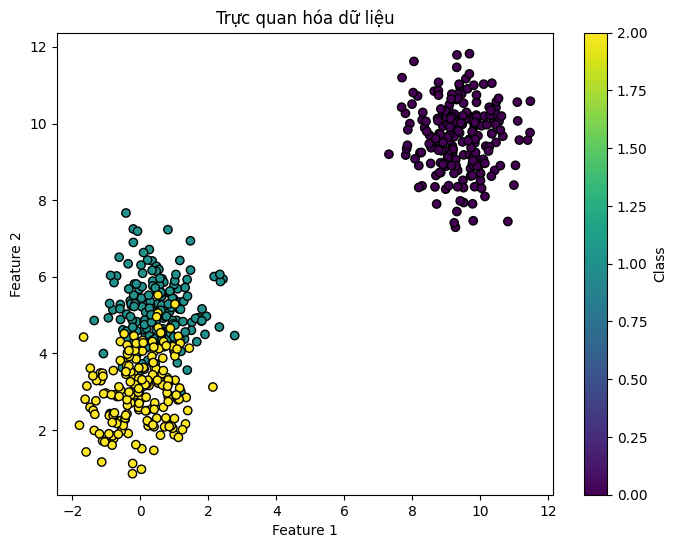

In [195]:
# Trực quan hóa dữ liệu
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", edgecolor="k")
plt.title("Trực quan hóa dữ liệu")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Class")
plt.show()

In [196]:
def euclid_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))


def k_mean_cluster(X, k, max_iters=100):
    # Khởi tạo các tâm cụm ngẫu nhiên
    centers = X[np.random.choice(X.shape[0], k, replace=False)]
    for _ in range(max_iters):
        # Tính khoảng cách từ mỗi điểm đến các tâm cụm
        distances = np.array([[euclid_distance(x, c) for c in centers] for x in X])
        # Gán nhãn cho mỗi điểm dựa trên tâm cụm gần nhất
        labels = np.argmin(distances, axis=1)
        # Cập nhật các tâm cụm
        new_center = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.all(centers == new_center):
            break
        centers = new_center
    return centers, labels


def predict(X, centers):
    distances = np.array([[euclid_distance(x, c) for c in centers] for x in X])
    labels = np.argmin(distances, axis=1)
    return labels


def cacl_accuracy(y_test, y_test_pred):
    return np.sum(y_test == y_test_pred) / len(y_test) * 100

In [197]:
# Example usage
k = 3
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
)
centers_pred, labels = k_mean_cluster(X_train, k)
# sắp xếp lại centers_pred để khớp với centers thực tế
new_centers = np.zeros(centers_pred.shape)
for i in range(k):
    new_centers[i] = centers_pred[
        np.argmin(np.sum((centers_pred - centers[i]) ** 2, axis=1))
    ]
centers_pred = new_centers
centers_pred, centers

(array([[ 9.39860932,  9.65703339],
        [ 0.543561  ,  5.07061375],
        [-0.10819313,  2.88713801]]),
 array([[9.2994173 , 9.52672931],
        [0.50837521, 5.06771939],
        [0.08219334, 2.97724811]]))

In [198]:
# dùng các tâm cụm dự đoán được để kiểm tra tập test
y_test_pred = predict(X_test, centers_pred)
accuracy = cacl_accuracy(y_test, y_test_pred)
accuracy

np.float64(94.16666666666667)